# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv("../data/regression.csv")
df = df.drop(columns=["pageviews"])

In [3]:
df.head(15)

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   AVG(diff)    29 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 828.0+ bytes


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [5]:
X = df[["num_commits", "AVG(diff)"]]

In [6]:
kmeans = KMeans(n_clusters=3, random_state=21)
df["kmeans"] = kmeans.fit_predict(X)

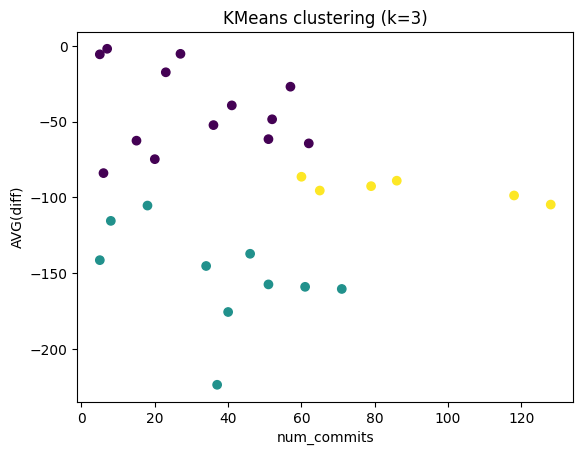

In [7]:
plt.scatter(df["num_commits"], df["AVG(diff)"], c=df["kmeans"], cmap="viridis")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.title("KMeans clustering (k=3)")
plt.show()

In [8]:
print("Silhouette score:", silhouette_score(X, df["kmeans"]))

Silhouette score: 0.4454402135233297


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

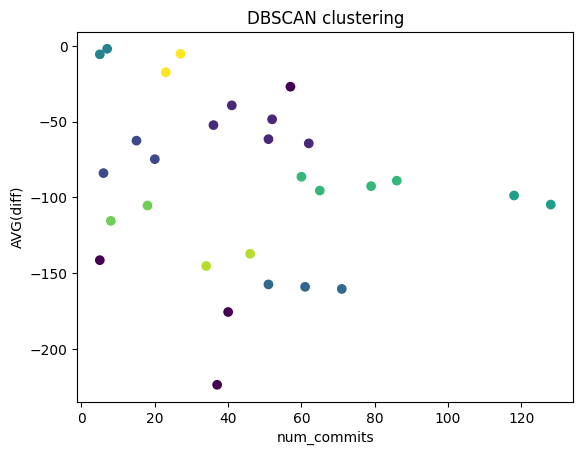

In [9]:
db = DBSCAN(eps=20, min_samples=2)
df["dbscan"] = db.fit_predict(X)

plt.scatter(df["num_commits"], df["AVG(diff)"], c=df["dbscan"], cmap="viridis")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.title("DBSCAN clustering")
plt.show()


In [10]:

print("Silhouette score:", silhouette_score(X, df["dbscan"]))

Silhouette score: 0.38339641455696616


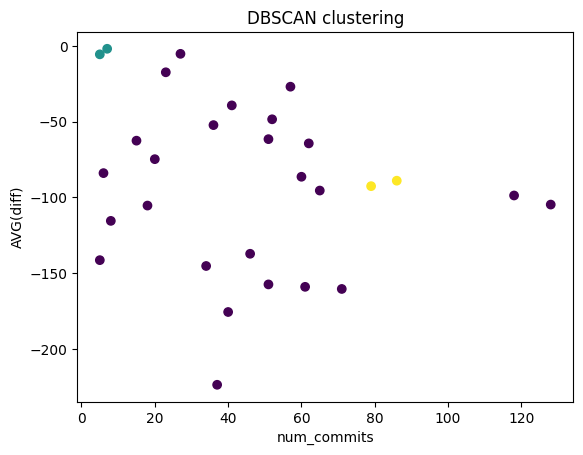

In [11]:
db = DBSCAN(eps=10, min_samples=2)
df["dbscan"] = db.fit_predict(X)

plt.scatter(df["num_commits"], df["AVG(diff)"], c=df["dbscan"], cmap="viridis")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.title("DBSCAN clustering")
plt.show()

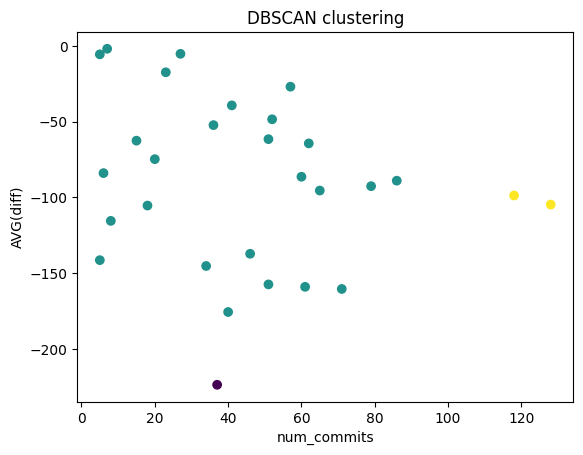

In [12]:
db = DBSCAN(eps=30, min_samples=2)
df["dbscan"] = db.fit_predict(X)

plt.scatter(df["num_commits"], df["AVG(diff)"], c=df["dbscan"], cmap="viridis")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.title("DBSCAN clustering")
plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [13]:
agg = AgglomerativeClustering(n_clusters=5)
df["agglo"] = agg.fit_predict(X)

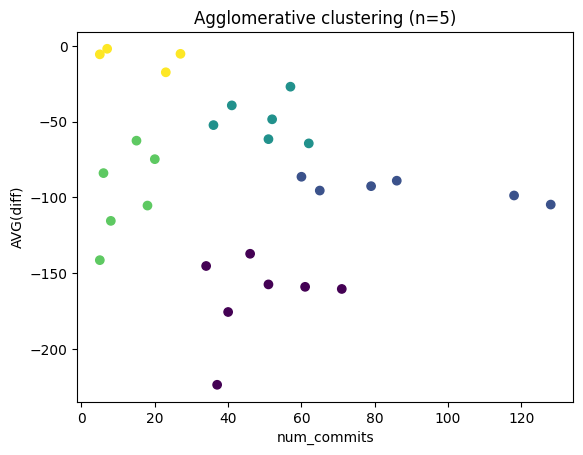

In [14]:
plt.scatter(df["num_commits"], df["AVG(diff)"], c=df["agglo"], cmap="viridis")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.title("Agglomerative clustering (n=5)")
plt.show()

In [15]:
print("Silhouette score:", silhouette_score(X, df["agglo"]))

Silhouette score: 0.46383015199381467


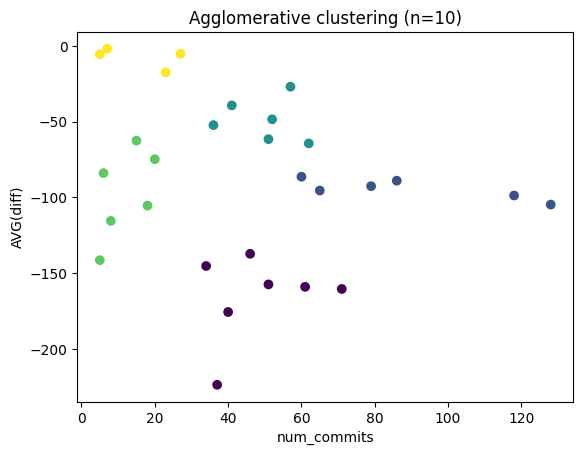

In [16]:
agg2 = AgglomerativeClustering(n_clusters=10)
tmp = agg.fit_predict(X)
plt.scatter(df["num_commits"], df["AVG(diff)"], c=tmp, cmap="viridis")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.title("Agglomerative clustering (n=10)")
plt.show()

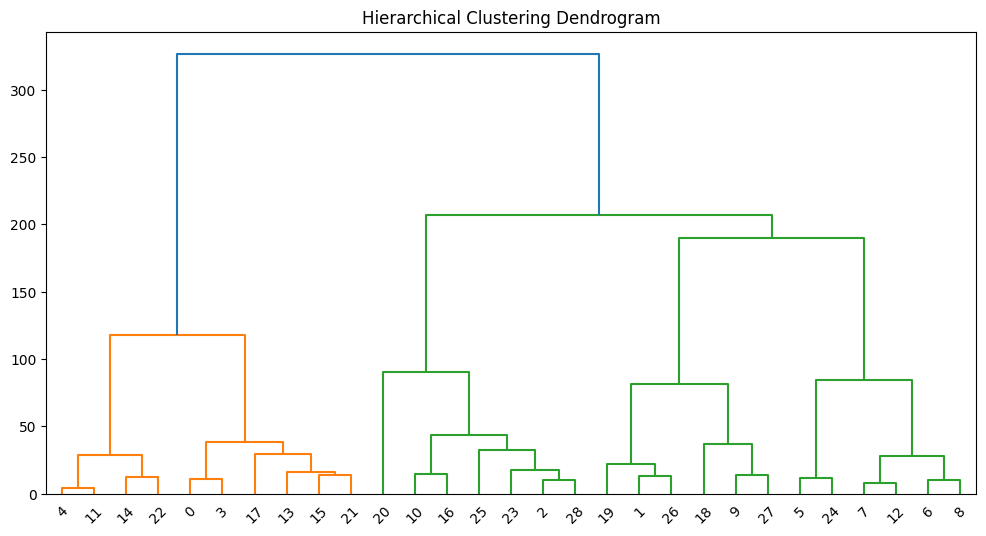

In [17]:
linked = linkage(X, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [18]:
def optimize_and_plot(model_class, param_name, param_range, X, **kwargs):
    scores = []
    best_score = -1
    best_param = None
    best_labels = None
    
    for val in param_range:
        params = {**kwargs, param_name: val}
        model = model_class(**params)
        labels = model.fit_predict(X)
        
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1
        
        scores.append(score)
        if score > best_score:
            best_score = score
            best_param = val
            best_labels = labels
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    axes[0].plot(param_range, scores, marker="o")
    axes[0].set_title(f"Silhouette score vs {param_name}")
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel("Silhouette score")
    

    axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_labels, cmap="viridis")
    axes[1].set_title(f"Best {param_name}={best_param}, score={best_score:.3f}")
    axes[1].set_xlabel(X.columns[0])
    axes[1].set_ylabel(X.columns[1])
    
    plt.show()
    return best_param, best_score

### KMeans

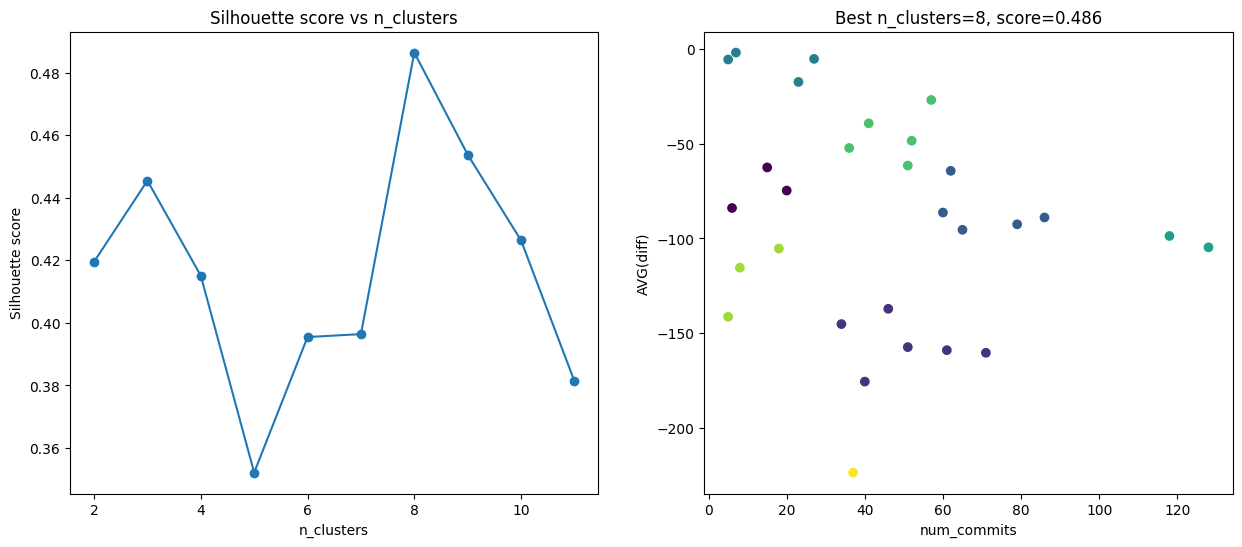

Best n_clusters for KMeans: 8


In [19]:
best_k, _ = optimize_and_plot(KMeans, "n_clusters", range(2, 12), X, random_state=21)
print("Best n_clusters for KMeans:", best_k)

### DBSCAN (eps)

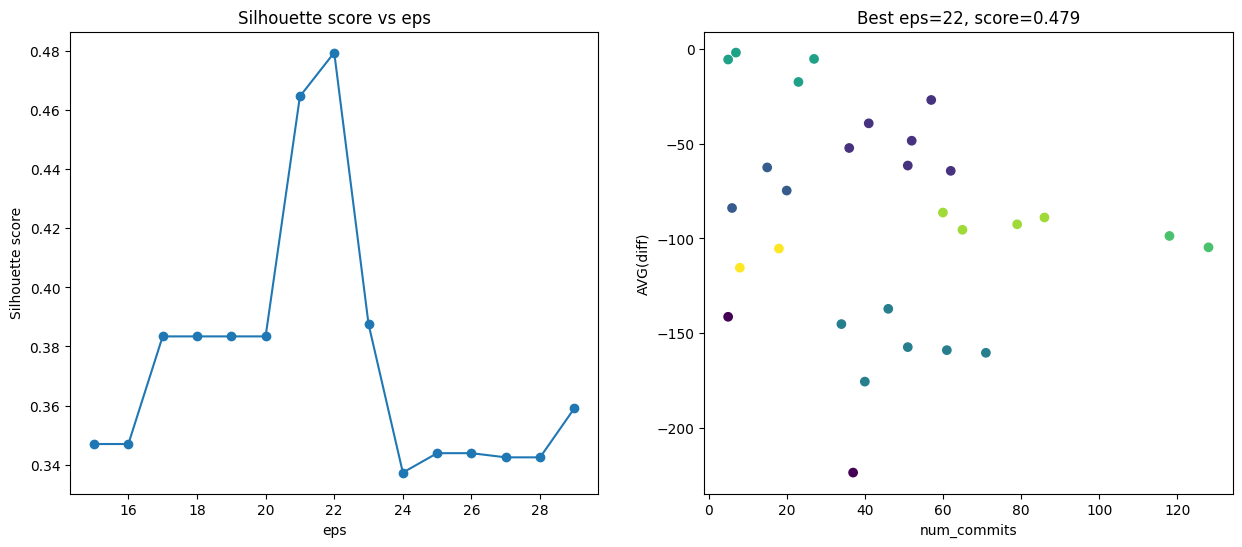

Best eps for DBSCAN: 22


In [20]:
best_eps, _ = optimize_and_plot(DBSCAN, "eps", range(15, 30), X, min_samples=2)
print("Best eps for DBSCAN:", best_eps)

### DBSCAN (min_samples)

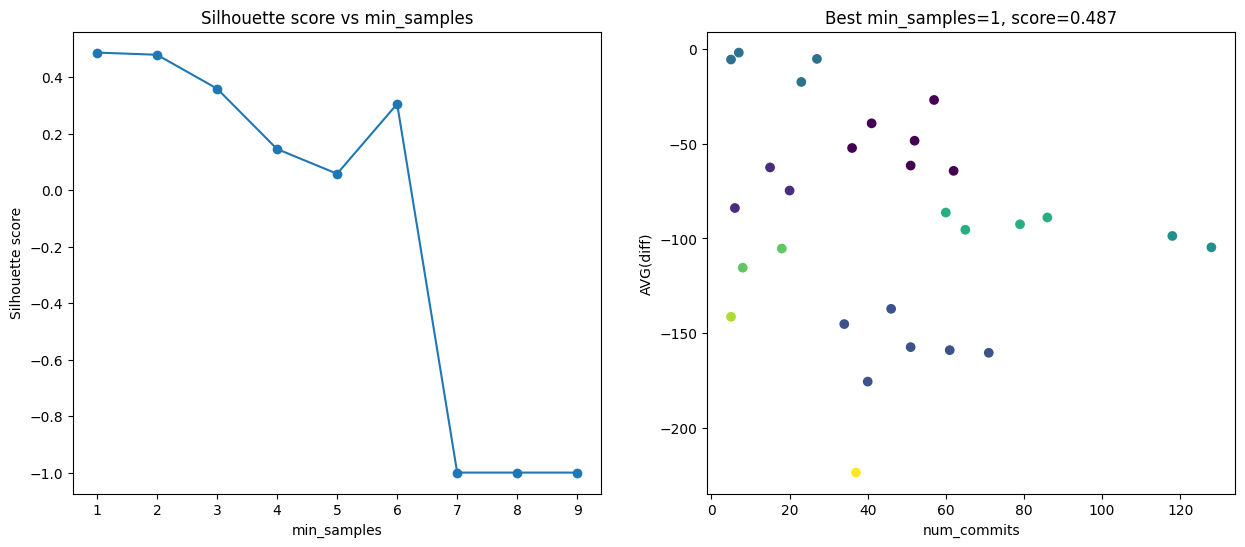

Best min_samples for DBSCAN: 1


In [21]:
best_min, _ = optimize_and_plot(DBSCAN, "min_samples", range(1, 10), X, eps=22)
print("Best min_samples for DBSCAN:", best_min)

### Agglomerative

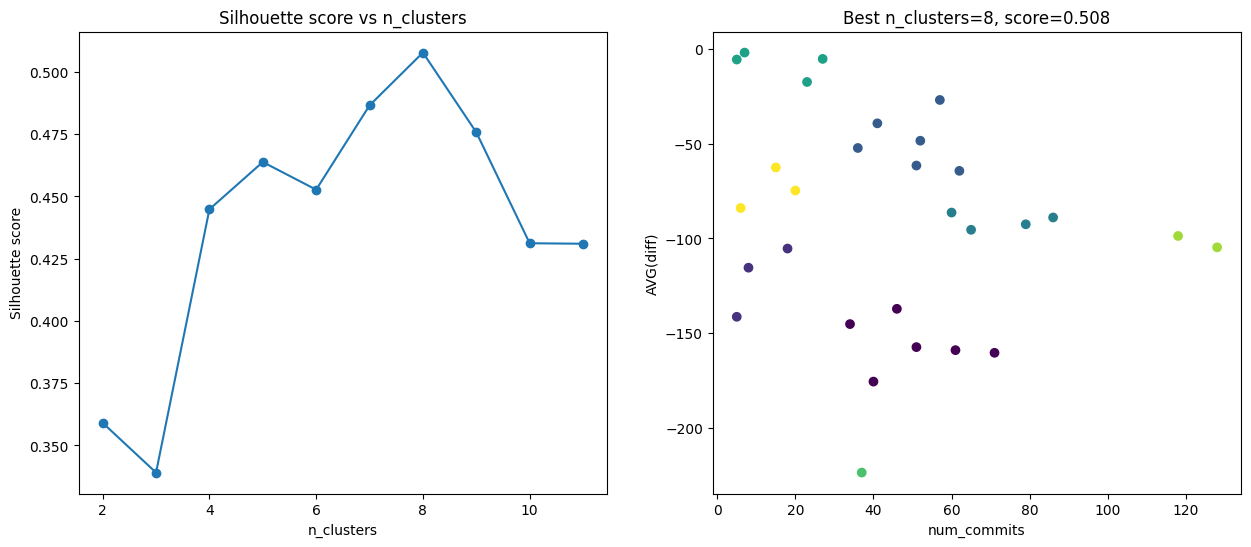

Best n_clusters for Agglomerative: 8


In [22]:

best_agg, _ = optimize_and_plot(AgglomerativeClustering, "n_clusters", range(2, 12), X)
print("Best n_clusters for Agglomerative:", best_agg)